In [270]:
import numpy as np
import torch

In [271]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [272]:
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [273]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [274]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.5066, -1.2955, -0.5363],
        [-0.2559, -0.7282, -1.5004]], requires_grad=True)
tensor([ 0.2019, -0.0928], requires_grad=True)


In [275]:
def model(x):
    return x @ w.t() + b

In [276]:
preds = model(inputs)
print(preds)

tensor([[ -72.6705, -132.0810],
        [-102.0178, -183.4876],
        [-160.4189, -206.9597],
        [ -23.6691, -113.0234],
        [-126.7451, -192.6853]], grad_fn=<AddBackward0>)


In [277]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [278]:
def mse(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

In [279]:
loss = mse(preds, targets)
print(loss)

tensor(53999.2266, grad_fn=<MeanBackward0>)


In [280]:
loss.backward()

In [281]:
print(w)
print(w.grad)

tensor([[ 0.5066, -1.2955, -0.5363],
        [-0.2559, -0.7282, -1.5004]], requires_grad=True)
tensor([[-14173.5352, -17237.5859, -10244.8369],
        [-21405.0879, -24100.3438, -14796.6367]])


In [282]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [283]:
loss = mse(preds, targets)
print(loss)

tensor(53999.2266, grad_fn=<MeanBackward0>)


In [284]:
preds = model(inputs)
print(preds)

tensor([[ -46.3677,  -93.9429],
        [ -67.3924, -133.3283],
        [-119.0459, -147.4582],
        [   1.9924,  -75.3497],
        [ -93.2442, -144.4192]], grad_fn=<AddBackward0>)


In [285]:
loss = mse(preds, targets)
print(loss)

tensor(37053.3281, grad_fn=<MeanBackward0>)


Text(0.5, 1.0, 'Loss vs. No. of epochs')

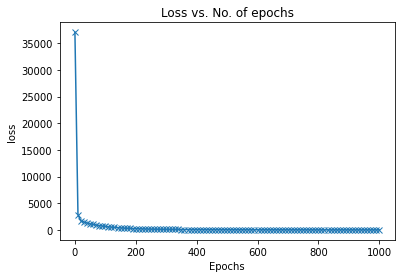

In [286]:
import matplotlib.pyplot as plt
epochs = 1000
losses = [mse(model(inputs), targets).item()]
for i in range(1, epochs+1):
    loss = mse(model(inputs), targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

    if i % 10 == 0:
        losses.append(loss.item())

plt.plot([x*10 for x in range(0,int((epochs/10))+1)], losses, '-x')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')

In [287]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(22.3283, grad_fn=<MeanBackward0>)


In [288]:
preds

tensor([[ 57.4010,  70.8402],
        [ 80.7603,  96.2572],
        [121.6045, 142.1409],
        [ 22.0951,  39.7004],
        [ 98.8520, 109.8777]], grad_fn=<AddBackward0>)

In [289]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [290]:
import torch.nn as nn
#Now using pytorch builtins
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [74, 66, 43],
                   [91, 87, 65],
                   [88, 134, 59],
                   [101, 44, 37],
                   [68, 96, 71],
                   [73, 66, 44],
                   [92, 87, 64],
                   [87, 135, 57],
                   [103, 43, 36],
                   [68, 97, 70]],
                  dtype='float32')

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [57, 69],
                    [80, 102],
                    [118, 132],
                    [21, 38],
                    [104, 118],
                    [57, 69],
                    [82, 100],
                    [118, 134],
                    [20, 38],
                    [102, 120]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [291]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

In [292]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [293]:
from torch.utils.data import TensorDataset, DataLoader

In [294]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [295]:
batch_size = 3
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [296]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 73.,  67.,  43.],
        [ 92.,  87.,  64.],
        [ 87., 134.,  58.]])
tensor([[ 56.,  70.],
        [ 82., 100.],
        [119., 133.]])


In [297]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.2542, -0.0009, -0.2993],
        [ 0.1237,  0.3657, -0.2448]], requires_grad=True)
Parameter containing:
tensor([-0.4953, -0.4972], requires_grad=True)


In [298]:
preds = model(inputs)
preds

tensor([[-31.9849,  22.5122],
        [-42.8652,  27.2788],
        [-40.0945,  45.0745],
        [-37.5404,  18.7928],
        [-39.0747,  26.0132],
        [-32.2382,  22.2702],
        [-43.1635,  26.6683],
        [-40.6480,  44.9535],
        [-37.2871,  19.0348],
        [-39.1198,  25.6447],
        [-32.2833,  21.9017],
        [-43.1185,  27.0368],
        [-39.7961,  45.6850],
        [-37.4954,  19.1614],
        [-38.8214,  26.2552]], grad_fn=<AddmmBackward0>)

In [299]:
import torch.nn.functional as F

In [300]:
loss_fn = F.mse_loss

In [301]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(9639.2666, grad_fn=<MseLossBackward0>)


In [302]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [303]:
def train(model, opt, loss_fn, train_dl, epochs):
    losses = [mse(model(inputs), targets).item()]
    for i in range(1, epochs+1):

        for xb, yb in train_dl:
            loss = loss_fn(model(xb), yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

        if i % 10 == 0:
            losses.append(loss.item())
            print('Epoch [{}/{}], Loss: {:.4f}'.format(i, epochs, loss.item()))

    plt.plot([x*10 for x in range(0,int((epochs/10))+1)], losses, '-x')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs')

Epoch [10/100], Loss: 22.9102
Epoch [20/100], Loss: 9.1070
Epoch [30/100], Loss: 25.4964
Epoch [40/100], Loss: 24.8782
Epoch [50/100], Loss: 24.3270
Epoch [60/100], Loss: 24.6619
Epoch [70/100], Loss: 17.9759
Epoch [80/100], Loss: 19.4217
Epoch [90/100], Loss: 7.9586
Epoch [100/100], Loss: 9.9419


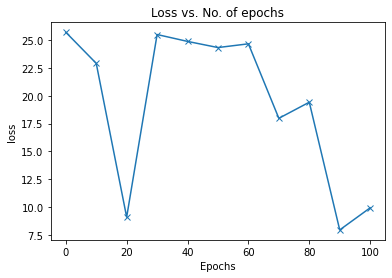

In [305]:
train(model, opt, loss_fn, train_dl, 100)

In [307]:
preds = model(inputs)
preds

tensor([[ 56.8304,  70.5597],
        [ 80.2048,  98.1516],
        [121.1607, 137.7792],
        [ 21.5163,  39.0819],
        [ 98.2768, 113.4891],
        [ 55.5550,  69.4346],
        [ 79.7718,  97.8065],
        [121.2998, 138.1453],
        [ 22.7917,  40.2071],
        [ 99.1192, 114.2692],
        [ 56.3974,  70.2146],
        [ 78.9294,  97.0264],
        [121.5937, 138.1243],
        [ 20.6738,  38.3019],
        [ 99.5523, 114.6143]], grad_fn=<AddmmBackward0>)

In [308]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [309]:
model(torch.tensor([75, 63, 44.]))

tensor([52.9227, 67.0460], grad_fn=<AddBackward0>)